In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


## Question 1 
Introduction: Special thanks to: https://github.com/justmarkham for sharing the dataset and materials. Occupations 
Step 1. Import the necessary libraries 
Step 2. Import the dataset from this address:
(https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user). 
Step 3. Assign it to a variable called users 
Step 4. Discover what is the mean age per occupation 
Step 5. Discover the Male ratio per occupation and sort it from the most to the least 
Step 6. For each occupation, calculate the minimum and maximum ages 
Step 7. For each combination of occupation and sex, calculate the mean age 
Step 8. For each occupation present the percentage of women and men 

In [4]:
#Step 1-3
import pandas as pd

users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep= "|")

users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [5]:
#Step 4
users.groupby("occupation").age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [6]:
#Step 5
mratio = users.groupby("occupation")["gender"].value_counts(normalize=True)*100
mratio.head()


occupation     gender
administrator  M          54.430380
               F          45.569620
artist         M          53.571429
               F          46.428571
doctor         M         100.000000
Name: gender, dtype: float64

In [8]:
mratio_df = pd.DataFrame(mratio)
mratio_df.rename(columns={"gender":"percent"}, inplace=True)
mratio_df.head()

percent
occupation    gender            
administrator M        54.430380
              F        45.569620
artist        M        53.571429
              F        46.428571
doctor        M       100.000000

In [9]:
#Step 6
usersOcc = users.groupby("occupation").age.agg([min, max])
usersOcc

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [11]:
#Step 7
usersOG = users.groupby(["occupation", "gender"]).age.mean()
usersOG.head()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
Name: age, dtype: float64

In [13]:
#Step 8
usersMF = users.groupby("occupation")["gender"].value_counts(normalize=True)*100
usersMF.head()

occupation     gender
administrator  M          54.430380
               F          45.569620
artist         M          53.571429
               F          46.428571
doctor         M         100.000000
Name: gender, dtype: float64

## Question 2 
Euro Teams 
Step 1. Import the necessary libraries 
Step 2. Import the dataset from this address:
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv
Step 3. Assign it to a variable called euro12 
Step 4. Select only the Goal column 
Step 5. How many team participated in the Euro2012? 
Step 6. What is the number of columns in the dataset? 
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline 
Step 8. Sort the teams by Red Cards, then to Yellow Cards 
Step 9. Calculate the mean Yellow Cards given per Team 
Step 10. Filter teams that scored more than 6 goals
Step 11. Select the teams that start with G 
Step 12. Select the first 7 columns 
Step 13. Select all columns except the last 3 
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [14]:
#Step 1-3
import pandas as pd

euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")

euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [15]:
#Step 4
euro12Goals = euro12.Goals
euro12Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [16]:
#Step 5
euro12t = euro12.shape[0]
euro12t

16

In [17]:
#Step 6
euro12c = euro12.shape[1]
euro12c

35

In [18]:
#Step 7
discipline_df = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline_df

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [19]:
#Step 8
discipline_df.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)


,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [20]:
#Step 9
round(discipline_df['Yellow Cards'].mean())

7

In [21]:
#Step 10
euro12goals = euro12[euro12.Goals>6]
euro12goals

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [22]:
#Step 11
euro12G = euro12[euro12.Team.str.startswith('G')]

euro12G

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [23]:
#Step 12
euro12c7 = euro12.iloc[: , 0:7]

euro12c7

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [24]:
#Step 13
euro12c3 = euro12.iloc[: , 0:-3]

euro12c3

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [25]:
#Step 14

euro12EIR = euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

euro12EIR


,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Question 3 
Housing 
Step 1. Import the necessary libraries 
Step 2. Create 3 differents Series, each of length 100, as follows: 
  • The first a random number from 1 to 4 
  • The second a random number from 1 to 3 
  • The third a random number from 10,000 to 30,000 
Step 3. Create a DataFrame by joinning the Series by column 
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter 
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn' 
Step 6. Ops it seems it is going only until index 99. Is it true? 
Step 7. Reindex the DataFrame so it goes from 0 to 299

In [26]:
#Step 1-2
import numpy as np
housing1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
housing2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
housing3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))
housing1
housing2
housing3

0     20463
1     12465
2     11203
3     24627
4     21187
      ...  
95    15680
96    13890
97    20858
98    13870
99    16661
Length: 100, dtype: int32

In [27]:
#Step 3
housing = pd.concat([housing1, housing2, housing3], axis=1)
housing

,0,1,2
0,2,3,20463
1,4,2,12465
2,1,2,11203
3,3,1,24627
4,3,1,21187
...,...,...,...
95,1,1,15680
96,4,2,13890
97,2,1,20858
98,3,2,13870


In [28]:
#Step 4
houseSize = housing.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'})
houseSize



,bedrs,bathrs,price_sqr_meter
0,2,3,20463
1,4,2,12465
2,1,2,11203
3,3,1,24627
4,3,1,21187
...,...,...,...
95,1,1,15680
96,4,2,13890
97,2,1,20858
98,3,2,13870


In [30]:
#Step 5
# join concat the values
bigcolumn = pd.concat([housing1, housing2, housing3], axis=0)

# it is still a Series, so we need to transform it to a DataFrame
bigcolumn = bigcolumn.to_frame()
print(type(bigcolumn))

bigcolumn

<class 'pandas.core.frame.DataFrame'>


,0
0,2
1,4
2,1
3,3
4,3
...,...
95,15680
96,13890
97,20858
98,13870


In [31]:
#Step 6
# no the index are kept but the length of the DataFrame is 300
len(bigcolumn)

300

In [32]:
#Step 7
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,2
1,4
2,1
3,3
4,3
...,...
295,15680
296,13890
297,20858
298,13870


## Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes! 

In [33]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [34]:
import numpy as np
import pandas as pd 

actorKill= pd.read_csv('actor_kill_counts.csv')
actorKill

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


<AxesSubplot: ylabel='Actor'>

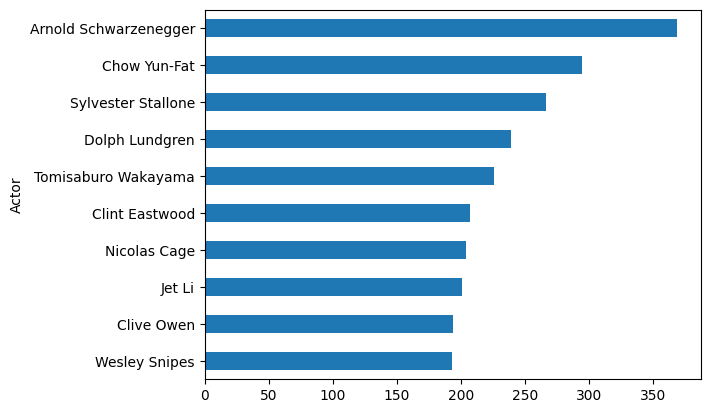

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
  
akc= pd.read_csv('actor_kill_counts.csv')  

df = akc.groupby('Actor')['Count'].mean().sort_values() 

df.plot(kind='barh')


## Question 9 

Create a pie chart showing the fraction of all Roman Emperors that were assassinated.  

Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories. 

In [36]:
roman= pd.read_csv('roman-emperor-reigns.csv')
roman

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


In [37]:
cod = roman['Cause_of_Death'].value_counts()
cod

Assassinated             22
Natural causes           16
Possibly assassinated     8
Killed in battle          8
Suicide                   5
Illness                   5
Executed                  3
Died in captivity         1
Name: Cause_of_Death, dtype: int64

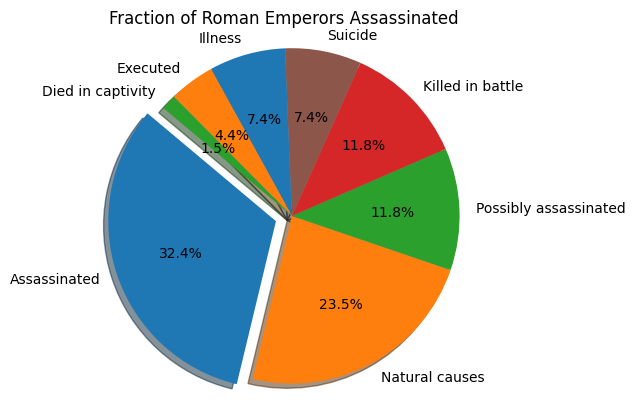

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
#emperor = roman.Emperor
#emperor = roman['Emperor']
cod = roman['Cause_of_Death'].value_counts()
label = roman['Cause_of_Death'].value_counts().index.tolist()
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
exp = (0.1, 0, 0, 0, 0, 0, 0, 0)  
plt.pie(cod, labels=label, colors=colors,
autopct='%1.1f%%', explode=exp, shadow=True, startangle=140)
plt.axis('equal')

plt.title("Fraction of Roman Emperors Assassinated")
plt.show()

## Question 10 

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.  

Don't forget to label your axes! 

Color each dot according to its year. 

In [39]:
arcade = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcade

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


Text(0, 0.5, 'Total Arcade Revenue (billions)')

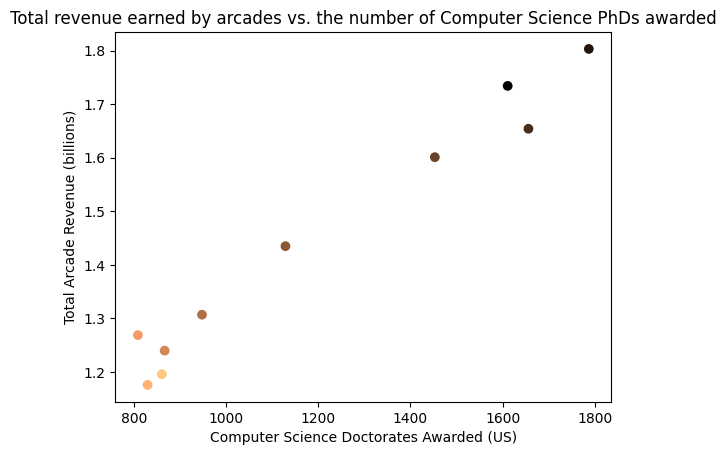

In [40]:
from matplotlib import pyplot as plt


years = arcade['Year']
revenues = arcade['Total Arcade Revenue (billions)']
phds = arcade['Computer Science Doctorates Awarded (US)']
plt.scatter(phds, revenues, c=years, cmap='copper_r')

plt.title('Total revenue earned by arcades vs. the number of Computer Science PhDs awarded')
plt.xlabel('Computer Science Doctorates Awarded (US)')
plt.ylabel('Total Arcade Revenue (billions)')
